# Fourier Transform: Descriptive Examples
In this Jupyter notebook are some basic examples to show what the Fourier Transform actually does.
First import the numpy stuff und define some basic functions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, exp, pi
from numpy.fft import fft, ifft

def rect(x, l=0.2):
    '''
    Generates a centered rectangle signal with length l
    '''
    a = (max(x)-l)/2
    b = (max(x)+l)/2
    return np.where((x >= a) & (x <= b), 1, 0)

def plotFT(signal, x=None, xlim=20, title='', ift=False, extra_data=None):
    '''
    Plots a signal in the time and the frequency space
    '''
    #plt.rc('text', usetex=True) # use only if Latex installed
    #plt.rc('font', family='serif')
    fig, ax = plt.subplots(3 if ift else 2, 1, constrained_layout=True, figsize=(5,5))
    f_signal = fft(signal)
    if x is None:
        ax[0].plot(signal)
    else:
        ax[0].plot(x, signal)
    ax[0].set_title('Time space: '+title)
    ax[0].set_xlabel('time x')
    ax[0].set_ylabel('signal f(x)')
    #ax2.plot(f_signal.real*2/len(signal), '.b')
    ax[1].plot(np.abs(f_signal*2/len(signal)), '.k')
    if extra_data is not None:
        ax[1].plot(extra_data)
    ax[1].set_xlim(0, xlim)
    ax[1].set_title('Frequency space: '+title)
    ax[1].set_xlabel('frequency xi')
    ax[1].set_ylabel('amplitude')
    if ift:
        r_signal = ifft(f_signal).real
        ax[2].plot(r_signal)
        ax[2].set_title('Reconstructed: '+title)
    if title:
        plt.savefig('plotFT-'+title.replace(' ','_')+'.pdf')
    plt.show()

Now we will obtain the Fourier Transform of a sine wave with frequency 10.
In the frequency space we see a single peak at frequency 10.

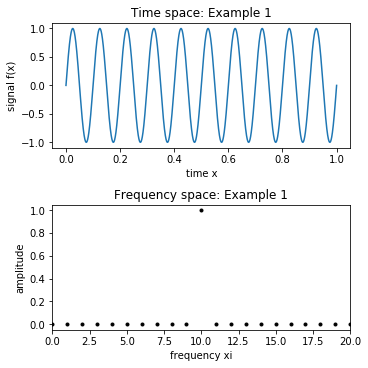

In [2]:
x = np.linspace(0,1,10**4)
signal = sin(10*2*pi*x)
plotFT(signal, x=x, title='Example 1')

After that we will obtain the Fourier Transform of a signal, which is a superposition of sine waves with different frequencies.
In the frequency space we see peaks at the frequencies of the different periodic parts of the signal.

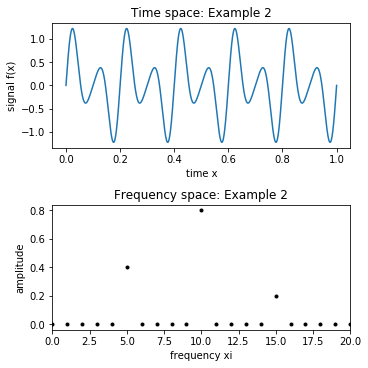

In [3]:
x = np.linspace(0,1,10**4)
signal = 0.8*sin(10*2*pi*x) + 0.4*sin(5*2*pi*x) + 0.2*sin(15*2*pi*x)
plotFT(signal, x=x, title='Example 2')

The Fourier Transform of a rectangle signal is the so called `sinc` function.

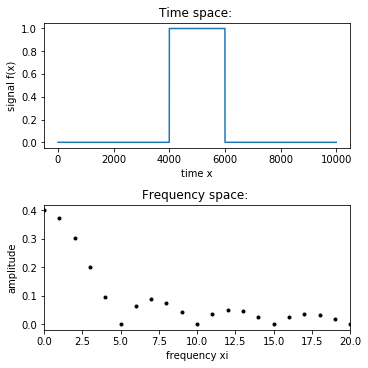

In [4]:
x = np.linspace(0,1,10**4)
signal = rect(x)
plotFT(signal)

For random data in the time space we also get random data in the frequency space.

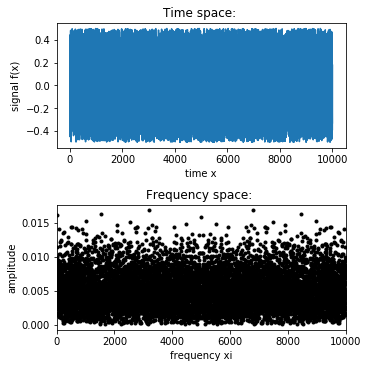

In [5]:
signal = np.random.rand(10**4)-0.5
plotFT(signal, xlim=10**4)

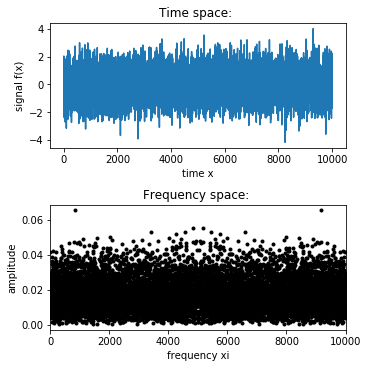

In [6]:
signal = np.random.randn(10**4)
plotFT(signal, xlim=10**4)